In [1]:
import os

In [2]:
os.chdir("C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))''' #for colab

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

# Importing dataset

In [5]:
data=pd.read_csv('Salary_Data.csv')

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [9]:
data.shape

(30, 2)

# checking null values

In [10]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

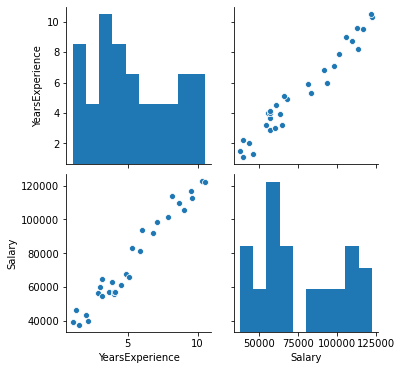

In [11]:
sns.pairplot(data)

# Checking correlation between variables

In [12]:
data.corr(method='pearson', min_periods=1)

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
# generating heatmaps for correlation

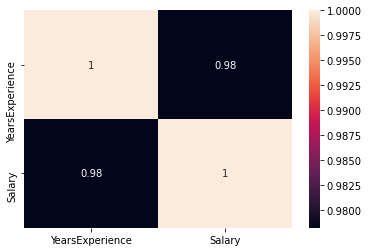

In [14]:
sns.heatmap(data.corr(), annot= True)

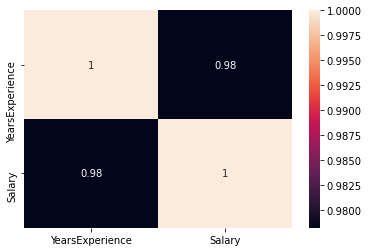

In [15]:
sns.heatmap(data.corr(method='pearson', min_periods=1),annot= True)

In [16]:
#splitting the dataset into dependent and independent features

In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [18]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [19]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [20]:
#Splitting Dataset into Training and Testing arrays

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [22]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [23]:
#training model

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.predict(X_test)

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [26]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [27]:
reg.intercept_

26780.09915062818

In [28]:
reg.coef_

array([9312.57512673])

In [29]:
#testing model

In [30]:
y_pred = reg.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [31]:
#checking r2 score for simple linear regression

In [32]:
from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y_test, y_pred))

r2 Score :  0.988169515729126


In [34]:
#salary=9312*EXP+26780

In [35]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [43]:
x_new_emp=pd.read_excel('prediction_new.xlsx')

In [44]:
x_new_emp

,Years of exp
0,4
1,8
2,3
3,2
4,7
5,4


In [45]:
x_new_emp.iloc[:,0:1].values

array([[4],
       [8],
       [3],
       [2],
       [7],
       [4]], dtype=int64)

In [46]:
reg.predict(x_new_emp)

array([ 64030.39965754, 101280.70016446,  54717.82453082,  45405.24940409,
        91968.12503773,  64030.39965754])

In [ ]:
#Visualizing Training DataSet Result using Matplotlib

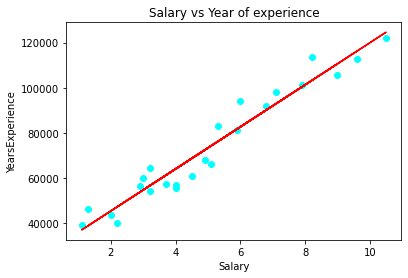

In [47]:
import matplotlib.pyplot as plt 
plt.scatter(X_train, y_train, color = 'cyan')
plt.plot(X_train, reg.predict(X_train),color = 'red')
plt.title('Salary vs Year of experience')
plt.xlabel ('Salary')
plt.ylabel ('YearsExperience')
plt.show()

In [ ]:
#Visualizing Training DataSet Result using Seaborn

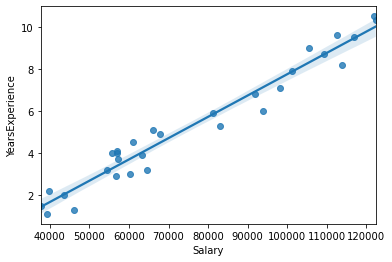

In [48]:
sns.regplot(x="Salary", y="YearsExperience", data=data);

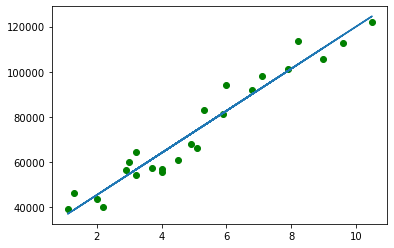

In [49]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,reg.predict(X_train))

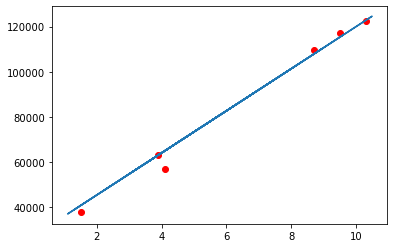

In [50]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,reg.predict(X_train))